# 비지도 학습
### 1. K-평균 군집화
* 데이터를 입력받아 소수의 그룹으로 묶는 알고리즘
* 몇 개의 클러스터를 구성할지 사전에 알 수 있을 때 사용

In [1]:
# 라이브러리 호출
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/AI/sales data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# 명목형 데이터 범주형(더미)으로 변경
cat_feat = ['Channel', 'Region']
# con_feat = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

for col in cat_feat:
    dummies = pd.get_dummies(data[col], prefix=col) # 항목에 포함된 명목형 값의 종류만큼 추출
    data = pd.concat([data, dummies], axis=1)       # 더미 열 추가 
    data.drop(col, axis=1, inplace=True)           # 원본 열 제거
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


In [4]:
# 데이터 전처리(스케일링 적용)
mms = MinMaxScaler()                     # 정규화 객체 생성
mms.fit(data)                            # 설정
data_transformed = mms.transform(data)   # 실행 후 반환
print(data_transformed)

[[0.11294004 0.13072723 0.08146416 ... 0.         0.         1.        ]
 [0.06289903 0.13282409 0.10309667 ... 0.         0.         1.        ]
 [0.05662161 0.11918086 0.08278992 ... 0.         0.         1.        ]
 ...
 [0.1295431  0.21013575 0.32594285 ... 0.         0.         1.        ]
 [0.091727   0.02622442 0.02402535 ... 0.         0.         1.        ]
 [0.02482434 0.02237109 0.02702178 ... 0.         0.         1.        ]]


In [11]:
# 리스트의 range 함수
a = range(10)        # 반복 가능 객체
a_ = list(a)
print(a_)
# 반복 가능 객체를 numpy 배열로 변환 가능
import numpy as np
b = np.array(a)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0 1 2 3 4 5 6 7 8 9]
0
1
2
3
4
5
6
7
8
9


C:\Users\user13\anaconda3\envs\tf2_book\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user13\anaconda3\envs\tf2_book\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user13\anaconda3\envs\tf2_book\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\user13\anaconda3\envs\tf2_book\lib\site-packages\sklearn\cluster\_kmeans.py:1334: 

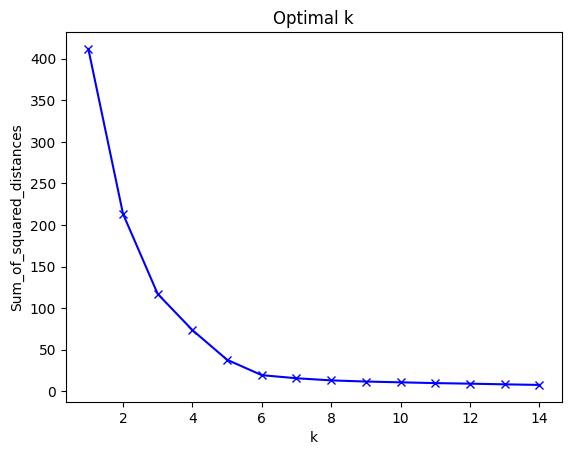

In [5]:
# 적당한 K값 추출
# 변화가 거의 없어지기 직전의 K가 적정.
Sum_of_squared_distances = []                     # 거리제곱의 합 저장용 리스트(K값마다 저장)
K = range(1,15)                                   # 반복 가능한 객체
for k in K:
    km = KMeans(n_clusters=k)                     # 클러스터링 위한 객체 생성
    km = km.fit(data_transformed)                 # K-means 실행 후 결과 반환
    Sum_of_squared_distances.append(km.inertia_)  # 거리제곱의 합
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title('Optimal k')
plt.show()

### 2. 밀도 기반 군집 분석 (DBSCAN)
* 일정 밀도 이상을 가진 데이터를 기준으로 군집을 형성하는 방법
* 다른 중심점을 포함하는 클러스터가 생기면 합쳐서 커져가는 방법
* 노이즈에 영향을 받지 않으며, 오목하거나 볼록한 부분을 처리하는 데 유용
* 클러스터의 숫자를 알지 못할 때 사용
* 이상치가 많이 포함되었을 때 사용

### 3. 주성분 분석 (PCA)
* 고차원 데이터를 저차원 데이터로 축소시키는 알고리즘
* 특성 p개를 두세 개 정도로 압축해서 데이터를 시각화하여 살펴보고 싶을 때 유용
* 이미지의 불필요한 부분 없애고 필요한 부분만을 가지고 판단. => 차원 축소 개념..

In [1]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [2]:
# 데이터 불러오기
X = pd.read_csv("C:/AI/credit card.csv")
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)   # 앞의 값으로 결측치가 채워짐 
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# 데이터 전처리 및 데이터를 2차원으로 차원 축소
scaler = StandardScaler()                 # 정규화 객체 생성
X_scaled = scaler.fit_transform(X)        # 정규화 설정 및 실행
#print(X_scaled,'\n')
X_norm = normalize(X_scaled)              # 표준정규분포로 정규화
#print(X_norm,'\n')
X_norm = pd.DataFrame(X_norm)             # 데이터프레임으로 변화
#print(X_norm)

pca = PCA(n_components=2)                 # 2차원으로 차원 축소용 객체 생성 (데이터프레임 사용)
X_pca = pca.fit_transform(X_norm)         # 차원축소 실행 (주성분 분석), 결과는 numpy배열
#print(X_pca)
X_pca = pd.DataFrame(X_pca)
#print(X_pca)
X_pca.columns = ['P1','P2']
#print(X_pca)
X_pca.head()

,P1,P2
0,-0.489949,-0.679975
1,-0.519099,0.544833
2,0.330633,0.268880
3,-0.481656,-0.097610
4,-0.563512,-0.482505


eps(입실론) 값이 작으면 군집이 잘 안될 수 있기에 노이즈가 발생할 가능성 커짐.
크면 클러스터 수가 작아짐.
적당한 값으로..

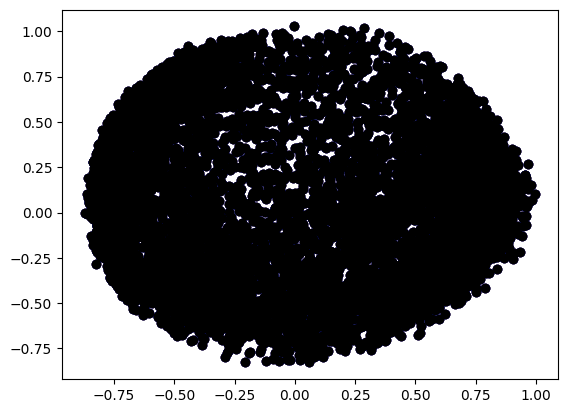

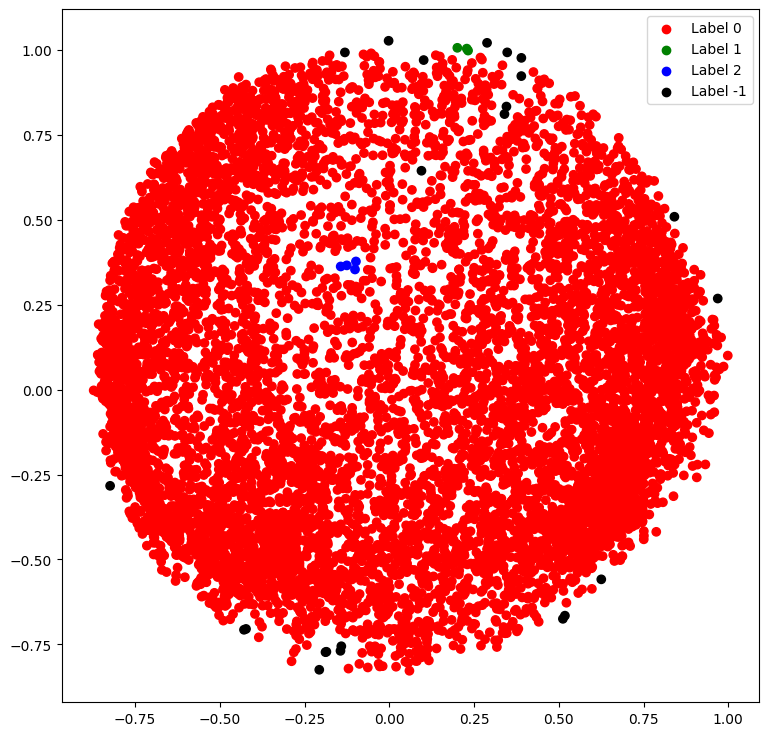

In [32]:
# DBSCAN 모델 생성 및 결과의 시각화
db_scan = DBSCAN(eps=0.0375, min_samples=3).fit(X_pca)
labels = db_scan.labels_

colours = {}                                         # 딕셔너리 선언 (색상 저장)
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]          # cvec 변수에 클러스터링된 개수만큼 저장
r = plt.scatter(X_pca['P1'], X_pca['P2'], color='r') # 범례 구성 위해 
g = plt.scatter(X_pca['P1'], X_pca['P2'], color='g') 
b = plt.scatter(X_pca['P1'], X_pca['P2'], color='b')  
k = plt.scatter(X_pca['P1'], X_pca['P2'], color='k') 

plt.figure(figsize=(9,9))
plt.scatter(X_pca['P1'], X_pca['P2'], c=cvec)
plt.legend((r,g,b,k), ('Label 0','Label 1','Label 2','Label -1'));

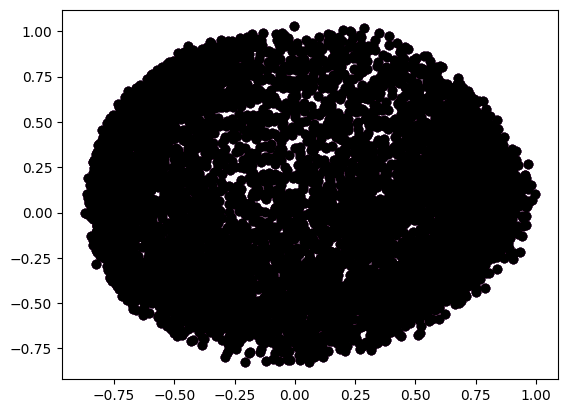

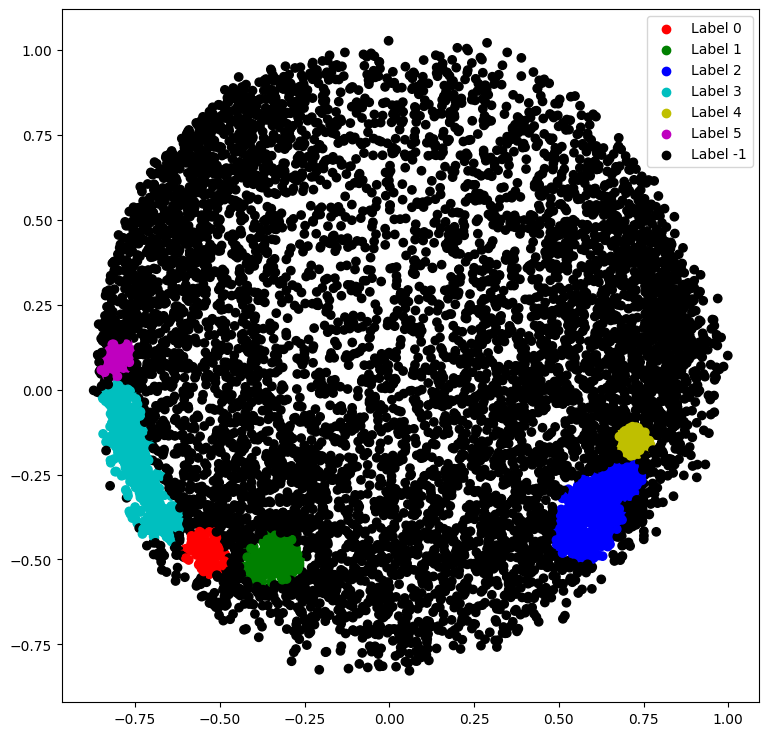

In [42]:
db_scan = DBSCAN(eps=0.0375, min_samples=50).fit(X_pca)
labels = db_scan.labels_

colours = {}                                         # 딕셔너리 선언 (색상 저장)
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[3] = 'c'
colours[4] = 'y'
colours[5] = 'm'
colours[-1] = 'k'

cvec = [colours[label] for label in labels]          # cvec 변수에 클러스터링된 개수만큼 저장
r = plt.scatter(X_pca['P1'], X_pca['P2'], color='r') # 범례 구성 위해 
g = plt.scatter(X_pca['P1'], X_pca['P2'], color='g') 
b = plt.scatter(X_pca['P1'], X_pca['P2'], color='b') 
c = plt.scatter(X_pca['P1'], X_pca['P2'], color='c') 
y = plt.scatter(X_pca['P1'], X_pca['P2'], color='y') 
m = plt.scatter(X_pca['P1'], X_pca['P2'], color='m')
k = plt.scatter(X_pca['P1'], X_pca['P2'], color='k')


plt.figure(figsize=(9,9))
plt.scatter(X_pca['P1'], X_pca['P2'], c=cvec)
plt.legend((r,g,b,c,y,m,k), ('Label 0','Label 1','Label 2','Label 3','Label 4','Label 5','Label -1'));